In [1]:
import numpy as np
import pandas as pd
import json

import warnings
warnings.filterwarnings("ignore")

from epilepsypcm.utils.outcome_params import node_location
from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

all_positive_patients = pd.read_csv("df_final_relabeled_withlatencies_withpatientname.csv", sep = ',').reset_index(drop = True)

# All Models

[00:33:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


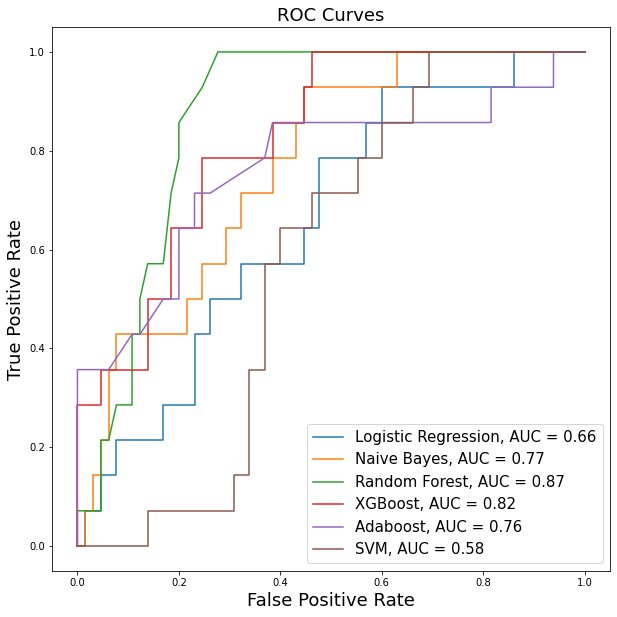

In [2]:
# stim + resp channels


X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV",
         "InDegree", "OutDegree", "EV", "Closeness"]

smote = False
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves", fontsize = 18)
plt.xlabel("False Positive Rate", fontsize = 18)
plt.ylabel("True Positive Rate", fontsize = 18)

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right', prop={'size': 15})



[00:33:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


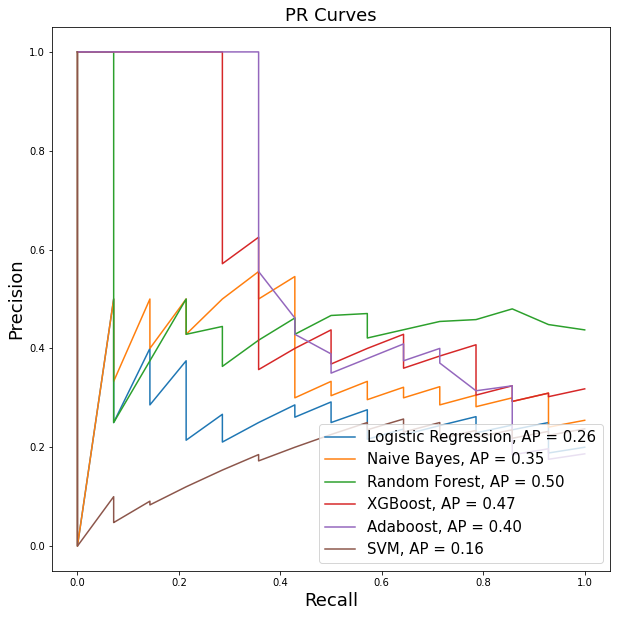

In [3]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves", fontsize = 18)
plt.xlabel("Recall", fontsize = 18)
plt.ylabel("Precision", fontsize = 18)

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right', prop={'size': 15})